In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import yfinance as yf

file = "Resources/Grocery_Restaurant Revenue Data.csv"

grocery_restaurant_df = pd.read_csv(file)
grocery_restaurant_df.head()

,Name,Revenue (mil) TTM USD,Revenue (mil) 2020 FY USD,Revenue (mil) Q4 USD (ESTIMATED),Revenue (mil) Q3 USD,Revenue (mil) Q2 USD,Revenue (mil) Q1 USD,Revenue (mil) FY 1 USD,Revenue (mil) FY 2 USD,Revenue (mil) FY 3 USD,Revenue (mil) FY 4 USD,Revenue (mil) FY 5 USD,Revenue (mil) FY 6 USD,Revenue (mil) FY 7 USD,Revenue (mil) FY 8 USD,Revenue (mil) FY 9 USD,Revenue (mil) FY 10 USD
0,Amazon.com Inc,347945.00,347945.00,87436.00,75452,88912,96145,280522.00,232887.00,177866.00,135987.00,107006.00,88988.00,74452.00,61093.00,48077.00,34204.00
1,Costco Wholesale Corp,172929.00,172929.00,39072.00,37266,53383,43208,166761.00,152703.00,141576.00,129025.00,118719.00,116199.00,112640.00,105156.00,99137.00,88915.00
2,Grocery Outlet Holding Corp,2983.34,2983.34,656.34,760,803,764,2559.62,2287.66,2075.47,1831.53,NaN,NaN,NaN,NaN,NaN,NaN
3,Sprouts Farmers Market Inc,6231.92,6231.92,1366.92,1646,1642,1577,5634.84,5207.34,4664.61,4046.39,3593.03,2967.42,2437.91,1794.82,1105.88,516.82
4,Target Corp,88621.00,88621.00,23399.00,19615,22975,22632,78112.00,75356.00,71879.00,69495.00,73785.00,72618.00,72596.00,73301.00,69865.00,67390.00


In [2]:
grocery_data_cleaned_df = grocery_restaurant_df[["Name",
                                                 "Revenue (mil) FY 10 USD",
                                                 "Revenue (mil) FY 9 USD",
                                                 "Revenue (mil) FY 8 USD",
                                                 "Revenue (mil) FY 7 USD",
                                                 "Revenue (mil) FY 6 USD",
                                                 "Revenue (mil) FY 5 USD",
                                                 "Revenue (mil) FY 4 USD",
                                                 "Revenue (mil) FY 3 USD",
                                                 "Revenue (mil) FY 2 USD",
                                                 "Revenue (mil) FY 1 USD", 
                                                 "Revenue (mil) 2020 FY USD"]]
grocery_data_cleaned_df.head()

,Name,Revenue (mil) FY 10 USD,Revenue (mil) FY 9 USD,Revenue (mil) FY 8 USD,Revenue (mil) FY 7 USD,Revenue (mil) FY 6 USD,Revenue (mil) FY 5 USD,Revenue (mil) FY 4 USD,Revenue (mil) FY 3 USD,Revenue (mil) FY 2 USD,Revenue (mil) FY 1 USD,Revenue (mil) 2020 FY USD
0,Amazon.com Inc,34204.00,48077.00,61093.00,74452.00,88988.00,107006.00,135987.00,177866.00,232887.00,280522.00,347945.00
1,Costco Wholesale Corp,88915.00,99137.00,105156.00,112640.00,116199.00,118719.00,129025.00,141576.00,152703.00,166761.00,172929.00
2,Grocery Outlet Holding Corp,NaN,NaN,NaN,NaN,NaN,NaN,1831.53,2075.47,2287.66,2559.62,2983.34
3,Sprouts Farmers Market Inc,516.82,1105.88,1794.82,2437.91,2967.42,3593.03,4046.39,4664.61,5207.34,5634.84,6231.92
4,Target Corp,67390.00,69865.00,73301.00,72596.00,72618.00,73785.00,69495.00,71879.00,75356.00,78112.00,88621.00


In [3]:
renamed_grocery_data_df = grocery_data_cleaned_df.rename(columns = {"Revenue (mil) 2020 FY USD":"2020 (Estimated) Revenue in Millions $",
                                                                    "Revenue (mil) FY 1 USD": "2019 Revenue in Millions $",
                                                                    "Revenue (mil) FY 2 USD": "2018 Revenue in Millions $",
                                                                    "Revenue (mil) FY 3 USD": "2017 Revenue in Millions $",
                                                                    "Revenue (mil) FY 4 USD": "2016 Revenue in Millions $",
                                                                    "Revenue (mil) FY 5 USD": "2015 Revenue in Millions $",
                                                                    "Revenue (mil) FY 6 USD": "2014 Revenue in Millions $",
                                                                    "Revenue (mil) FY 7 USD": "2013 Revenue in Millions $",
                                                                    "Revenue (mil) FY 8 USD": "2012 Revenue in Millions $",
                                                                    "Revenue (mil) FY 9 USD": "2011 Revenue in Millions $",
                                                                    "Revenue (mil) FY 10 USD":"2010 Revenue in Millions $"})

renamed_grocery_data_df

,Name,2010 Revenue in Millions $,2011 Revenue in Millions $,2012 Revenue in Millions $,2013 Revenue in Millions $,2014 Revenue in Millions $,2015 Revenue in Millions $,2016 Revenue in Millions $,2017 Revenue in Millions $,2018 Revenue in Millions $,2019 Revenue in Millions $,2020 (Estimated) Revenue in Millions $
0,Amazon.com Inc,34204.00,48077.00,61093.00,74452.00,88988.00,107006.00,135987.00,177866.00,232887.00,280522.00,347945.00
1,Costco Wholesale Corp,88915.00,99137.00,105156.00,112640.00,116199.00,118719.00,129025.00,141576.00,152703.00,166761.00,172929.00
2,Grocery Outlet Holding Corp,NaN,NaN,NaN,NaN,NaN,NaN,1831.53,2075.47,2287.66,2559.62,2983.34
3,Sprouts Farmers Market Inc,516.82,1105.88,1794.82,2437.91,2967.42,3593.03,4046.39,4664.61,5207.34,5634.84,6231.92
4,Target Corp,67390.00,69865.00,73301.00,72596.00,72618.00,73785.00,69495.00,71879.00,75356.00,78112.00,88621.00
5,The Kroger Co,82049.00,90269.00,96619.00,98375.00,108465.00,109830.00,115337.00,123280.00,121852.00,122286.00,130654.00
6,Walmart Inc,421849.00,446509.00,468651.00,476294.00,485651.00,482130.00,485873.00,500343.00,514405.00,523964.00,548743.00
7,Bloomin Brands Inc,3628.29,3841.26,3987.80,4129.23,4442.71,4377.68,4260.67,4223.14,4126.41,4139.39,3380.24
8,Brinker International Inc,2761.39,2820.72,2849.72,2909.50,3002.28,3257.49,3150.80,3135.40,3217.90,3078.50,3032.60
9,Cheesecake Factory Inc,1659.40,1757.62,1809.02,1877.91,1976.62,2100.61,2275.72,2260.50,2332.33,2482.69,2122.70


In [4]:
percent_change = ((renamed_grocery_data_df["2011 Revenue in Millions $"]/renamed_grocery_data_df["2010 Revenue in Millions $"]-1)*100,
                  (renamed_grocery_data_df["2012 Revenue in Millions $"]/renamed_grocery_data_df["2011 Revenue in Millions $"]-1)*100,
                  (renamed_grocery_data_df["2013 Revenue in Millions $"]/renamed_grocery_data_df["2012 Revenue in Millions $"]-1)*100,
                  (renamed_grocery_data_df["2014 Revenue in Millions $"]/renamed_grocery_data_df["2013 Revenue in Millions $"]-1)*100,
                  (renamed_grocery_data_df["2015 Revenue in Millions $"]/renamed_grocery_data_df["2014 Revenue in Millions $"]-1)*100,
                  (renamed_grocery_data_df["2016 Revenue in Millions $"]/renamed_grocery_data_df["2015 Revenue in Millions $"]-1)*100,
                  (renamed_grocery_data_df["2017 Revenue in Millions $"]/renamed_grocery_data_df["2016 Revenue in Millions $"]-1)*100,
                  (renamed_grocery_data_df["2018 Revenue in Millions $"]/renamed_grocery_data_df["2017 Revenue in Millions $"]-1)*100,
                  (renamed_grocery_data_df["2019 Revenue in Millions $"]/renamed_grocery_data_df["2018 Revenue in Millions $"]-1)*100,
                  (renamed_grocery_data_df["2020 (Estimated) Revenue in Millions $"]/renamed_grocery_data_df["2019 Revenue in Millions $"]-1)*100)
                     
percent_change_df = pd.DataFrame(percent_change)

percent_change_transpose_df = percent_change_df.transpose()
percent_change_transpose_df

,0,1,2,3,4,5,6,7,8,9
0,40.559584,27.073237,21.866662,19.523989,20.247674,27.083528,30.796326,30.933962,20.454126,24.034835
1,11.496373,6.071396,7.117045,3.159624,2.168693,8.681003,9.727572,7.859383,9.206106,3.698707
2,NaN,NaN,NaN,NaN,NaN,NaN,13.318919,10.223708,11.888130,16.554020
3,113.977787,62.297899,35.830334,21.719834,21.082624,12.617763,15.278310,11.635056,8.209566,10.596219
4,3.672652,4.918056,-0.961788,0.030305,1.607040,-5.814190,3.430463,4.837296,3.657307,13.453759
5,10.018404,7.034530,1.817448,10.256671,1.258470,5.014113,6.886775,-1.158339,0.356170,6.842975
6,5.845694,4.958915,1.630851,1.964543,-0.725006,0.776347,2.978144,2.810472,1.858263,4.729142
7,5.869707,3.814894,3.546567,7.591730,-1.463746,-2.672877,-0.880847,-2.290476,0.314559,-18.339659
8,2.148556,1.028106,2.097750,3.188864,8.500540,-3.275221,-0.488765,2.631243,-4.332018,-1.490986
9,5.919007,2.924409,3.808139,5.256375,6.272829,8.336150,-0.668799,3.177616,6.446772,-14.499998


In [5]:
percent_change_final_df = percent_change_transpose_df.round(2)
percent_change_final_df

,0,1,2,3,4,5,6,7,8,9
0,40.56,27.07,21.87,19.52,20.25,27.08,30.80,30.93,20.45,24.03
1,11.50,6.07,7.12,3.16,2.17,8.68,9.73,7.86,9.21,3.70
2,NaN,NaN,NaN,NaN,NaN,NaN,13.32,10.22,11.89,16.55
3,113.98,62.30,35.83,21.72,21.08,12.62,15.28,11.64,8.21,10.60
4,3.67,4.92,-0.96,0.03,1.61,-5.81,3.43,4.84,3.66,13.45
5,10.02,7.03,1.82,10.26,1.26,5.01,6.89,-1.16,0.36,6.84
6,5.85,4.96,1.63,1.96,-0.73,0.78,2.98,2.81,1.86,4.73
7,5.87,3.81,3.55,7.59,-1.46,-2.67,-0.88,-2.29,0.31,-18.34
8,2.15,1.03,2.10,3.19,8.50,-3.28,-0.49,2.63,-4.33,-1.49
9,5.92,2.92,3.81,5.26,6.27,8.34,-0.67,3.18,6.45,-14.50


In [6]:
percent_change_final_df["Name"]=renamed_grocery_data_df["Name"]
percent_change_final_df

,0,1,2,3,4,5,6,7,8,9,Name
0,40.56,27.07,21.87,19.52,20.25,27.08,30.80,30.93,20.45,24.03,Amazon.com Inc
1,11.50,6.07,7.12,3.16,2.17,8.68,9.73,7.86,9.21,3.70,Costco Wholesale Corp
2,NaN,NaN,NaN,NaN,NaN,NaN,13.32,10.22,11.89,16.55,Grocery Outlet Holding Corp
3,113.98,62.30,35.83,21.72,21.08,12.62,15.28,11.64,8.21,10.60,Sprouts Farmers Market Inc
4,3.67,4.92,-0.96,0.03,1.61,-5.81,3.43,4.84,3.66,13.45,Target Corp
5,10.02,7.03,1.82,10.26,1.26,5.01,6.89,-1.16,0.36,6.84,The Kroger Co
6,5.85,4.96,1.63,1.96,-0.73,0.78,2.98,2.81,1.86,4.73,Walmart Inc
7,5.87,3.81,3.55,7.59,-1.46,-2.67,-0.88,-2.29,0.31,-18.34,Bloomin Brands Inc
8,2.15,1.03,2.10,3.19,8.50,-3.28,-0.49,2.63,-4.33,-1.49,Brinker International Inc
9,5.92,2.92,3.81,5.26,6.27,8.34,-0.67,3.18,6.45,-14.50,Cheesecake Factory Inc


In [7]:
renamed_percent_change_df = percent_change_final_df.rename(columns = {0:"2011 % Change in Revenue YoY",
                                                                    1: "2012 % Change in Revenue YoY",
                                                                    2:"2013 % Change in Revenue YoY",
                                                                    3:"2014 % Change in Revenue YoY",
                                                                    4:"2015 % Change in Revenue YoY",
                                                                    5:"2016 % Change in Revenue YoY",
                                                                    6:"2017 % Change in Revenue YoY",
                                                                    7:"2018 % Change in Revenue YoY",
                                                                    8:"2019 % Change in Revenue YoY",
                                                                    9:"2020 % Change in Revenue YoY"})
                                                                    

renamed_percent_change_df


,2011 % Change in Revenue YoY,2012 % Change in Revenue YoY,2013 % Change in Revenue YoY,2014 % Change in Revenue YoY,2015 % Change in Revenue YoY,2016 % Change in Revenue YoY,2017 % Change in Revenue YoY,2018 % Change in Revenue YoY,2019 % Change in Revenue YoY,2020 % Change in Revenue YoY,Name
0,40.56,27.07,21.87,19.52,20.25,27.08,30.80,30.93,20.45,24.03,Amazon.com Inc
1,11.50,6.07,7.12,3.16,2.17,8.68,9.73,7.86,9.21,3.70,Costco Wholesale Corp
2,NaN,NaN,NaN,NaN,NaN,NaN,13.32,10.22,11.89,16.55,Grocery Outlet Holding Corp
3,113.98,62.30,35.83,21.72,21.08,12.62,15.28,11.64,8.21,10.60,Sprouts Farmers Market Inc
4,3.67,4.92,-0.96,0.03,1.61,-5.81,3.43,4.84,3.66,13.45,Target Corp
5,10.02,7.03,1.82,10.26,1.26,5.01,6.89,-1.16,0.36,6.84,The Kroger Co
6,5.85,4.96,1.63,1.96,-0.73,0.78,2.98,2.81,1.86,4.73,Walmart Inc
7,5.87,3.81,3.55,7.59,-1.46,-2.67,-0.88,-2.29,0.31,-18.34,Bloomin Brands Inc
8,2.15,1.03,2.10,3.19,8.50,-3.28,-0.49,2.63,-4.33,-1.49,Brinker International Inc
9,5.92,2.92,3.81,5.26,6.27,8.34,-0.67,3.18,6.45,-14.50,Cheesecake Factory Inc


In [8]:
renamed_percent_change_final_df = renamed_percent_change_df[["Name",
                                                            "2011 % Change in Revenue YoY",
                                                            "2012 % Change in Revenue YoY",
                                                            "2013 % Change in Revenue YoY",
                                                            "2014 % Change in Revenue YoY",
                                                            "2015 % Change in Revenue YoY",
                                                            "2016 % Change in Revenue YoY",
                                                            "2017 % Change in Revenue YoY",
                                                            "2018 % Change in Revenue YoY",
                                                            "2019 % Change in Revenue YoY",
                                                            "2020 % Change in Revenue YoY"]]

renamed_percent_change_final_df

,Name,2011 % Change in Revenue YoY,2012 % Change in Revenue YoY,2013 % Change in Revenue YoY,2014 % Change in Revenue YoY,2015 % Change in Revenue YoY,2016 % Change in Revenue YoY,2017 % Change in Revenue YoY,2018 % Change in Revenue YoY,2019 % Change in Revenue YoY,2020 % Change in Revenue YoY
0,Amazon.com Inc,40.56,27.07,21.87,19.52,20.25,27.08,30.80,30.93,20.45,24.03
1,Costco Wholesale Corp,11.50,6.07,7.12,3.16,2.17,8.68,9.73,7.86,9.21,3.70
2,Grocery Outlet Holding Corp,NaN,NaN,NaN,NaN,NaN,NaN,13.32,10.22,11.89,16.55
3,Sprouts Farmers Market Inc,113.98,62.30,35.83,21.72,21.08,12.62,15.28,11.64,8.21,10.60
4,Target Corp,3.67,4.92,-0.96,0.03,1.61,-5.81,3.43,4.84,3.66,13.45
5,The Kroger Co,10.02,7.03,1.82,10.26,1.26,5.01,6.89,-1.16,0.36,6.84
6,Walmart Inc,5.85,4.96,1.63,1.96,-0.73,0.78,2.98,2.81,1.86,4.73
7,Bloomin Brands Inc,5.87,3.81,3.55,7.59,-1.46,-2.67,-0.88,-2.29,0.31,-18.34
8,Brinker International Inc,2.15,1.03,2.10,3.19,8.50,-3.28,-0.49,2.63,-4.33,-1.49
9,Cheesecake Factory Inc,5.92,2.92,3.81,5.26,6.27,8.34,-0.67,3.18,6.45,-14.50


In [9]:
indexed_percent_change_df = renamed_percent_change_final_df.set_index("Name")
years = indexed_percent_change_df.keys()

print(years)

Index(['2011 % Change in Revenue YoY', '2012 % Change in Revenue YoY',
       '2013 % Change in Revenue YoY', '2014 % Change in Revenue YoY',
       '2015 % Change in Revenue YoY', '2016 % Change in Revenue YoY',
       '2017 % Change in Revenue YoY', '2018 % Change in Revenue YoY',
       '2019 % Change in Revenue YoY', '2020 % Change in Revenue YoY'],
      dtype='object')


Text(0.5, 1.0, 'Grocery/Retail and Publicly Traded Restaurant Revenues as % Change by Year')

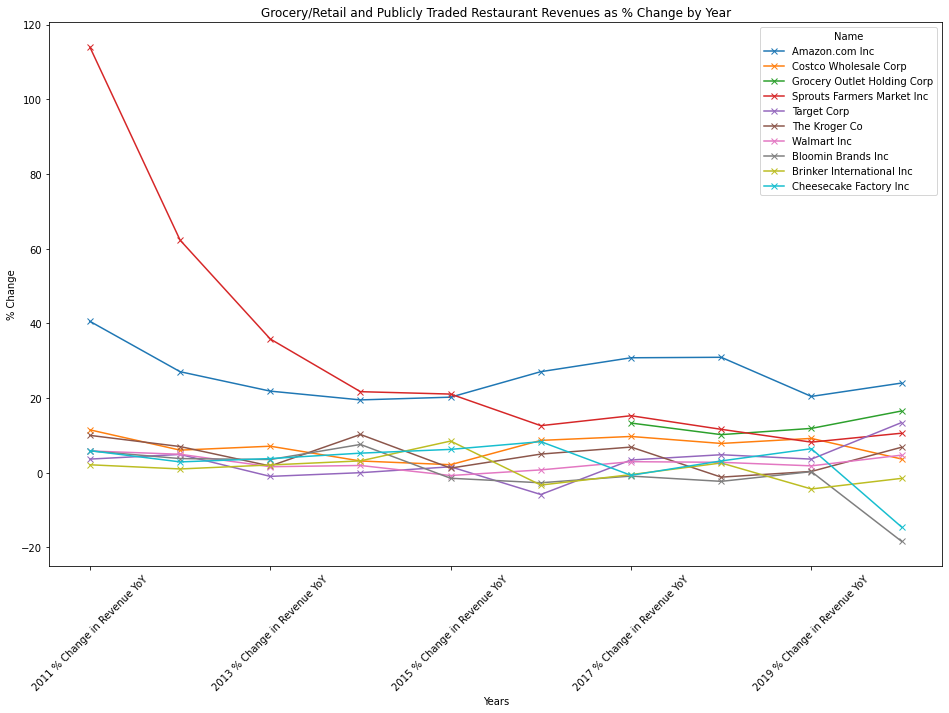

In [11]:
lables=[]
indexed_percent_change_df.transpose().plot(kind='line',marker='x',figsize = (16,10))
plt.xticks(rotation=45)
plt.xlabel("Years")
plt.ylabel( "% Change")
plt.title("Grocery/Retail and Publicly Traded Restaurant Revenues as % Change by Year")
